# Section 2.3 — Inventory of discrete distributions

This notebook contains all the code examples from [Section 2.3 Inventory of discrete distributions]() of the **No Bullshit Guide to Statistics**.


#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,5)},
)

%config InlineBackend.figure_format = 'retina'

DESTDIR = "figures/prob/probpanels"  # where to save figures

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
# Download the `plot_helpers.py` module from the book's main github repo:
import os, requests
if not os.path.exists("plot_helpers.py"):
    resp = requests.get("https://raw.githubusercontent.com/minireference/noBSstatsnotebooks/main/notebooks/plot_helpers.py")
    with open("plot_helpers.py", "w") as f:
        f.write(resp.text)
    print("Downloaded `plot_helpers.py` module to current directory:", os.getcwd())
else:
    print("You already have plot_helpers.py, so we can proceed.")

from plot_helpers import ensure_containing_dir_exists
from plot_helpers import generate_pmf_panel
from plot_helpers import plot_pmf
from plot_helpers import plot_cdf

You already have plot_helpers.py, so we can proceed.


## Definitions

## Math prerequisites

### Combinatorics

See SciPy docs:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.perm.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html




#### Factorial

In [5]:
from scipy.special import factorial
# ALT.
# from math import factorial

In [6]:
factorial(0)

1.0

In [7]:
 factorial(1), factorial(2), factorial(3)

(1.0, 2.0, 6.0)

In [8]:
factorial(10)

3628800.0

#### Permutations

In [9]:
from scipy.special import perm

perm(5,0)

1.0

In [10]:
perm(5,1), perm(5,2), perm(5,3), perm(5,4), perm(5,5)

(5.0, 20.0, 60.0, 120.0, 120.0)

If you want to actually see, all the possible permutations we 
use the permutations function from `itertools`

In [11]:
from itertools import permutations

n = 5
k = 2
list(permutations(range(1,n+1), k))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4)]

#### Combinations

In [12]:
from scipy.special import comb


comb(5,0), comb(5,1), comb(5,2), comb(5,3), comb(5,4), comb(5,5)

(1.0, 5.0, 10.0, 10.0, 5.0, 1.0)

In [13]:
from itertools import combinations

n = 5
k = 2
list(combinations(range(1,n+1), k))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

### Summations



In [14]:
from sympy import symbols
from sympy import summation
from sympy import simplify

k, N, r = symbols("k N r")

#### Sum of arithmetic sequence

In [15]:
a_k = k

summation(a_k, (k,0, N))

N**2/2 + N/2

In [16]:
simplify(summation(a_k, (k,0, N)))

N*(N + 1)/2

#### Sum of squares

In [17]:
b_k = k**2

simplify(summation(b_k, (k,0, N)))

N*(2*N**2 + 3*N + 1)/6

#### Sum of cubes

In [18]:
c_k = k**3

simplify(summation(c_k, (k,0, N)))

N**2*(N**2 + 2*N + 1)/4

#### Geometric series

In [19]:
g_k = r**k

summation(g_k, (k,0, N))

Piecewise((N + 1, Eq(r, 1)), ((1 - r**(N + 1))/(1 - r), True))

In [20]:
# from sympy import limit, oo
# limit( (1-r**(N+1))/(1-r), N, oo)
# # doesn't work; need to specify assumption r < 1

## Discrete distributions reference

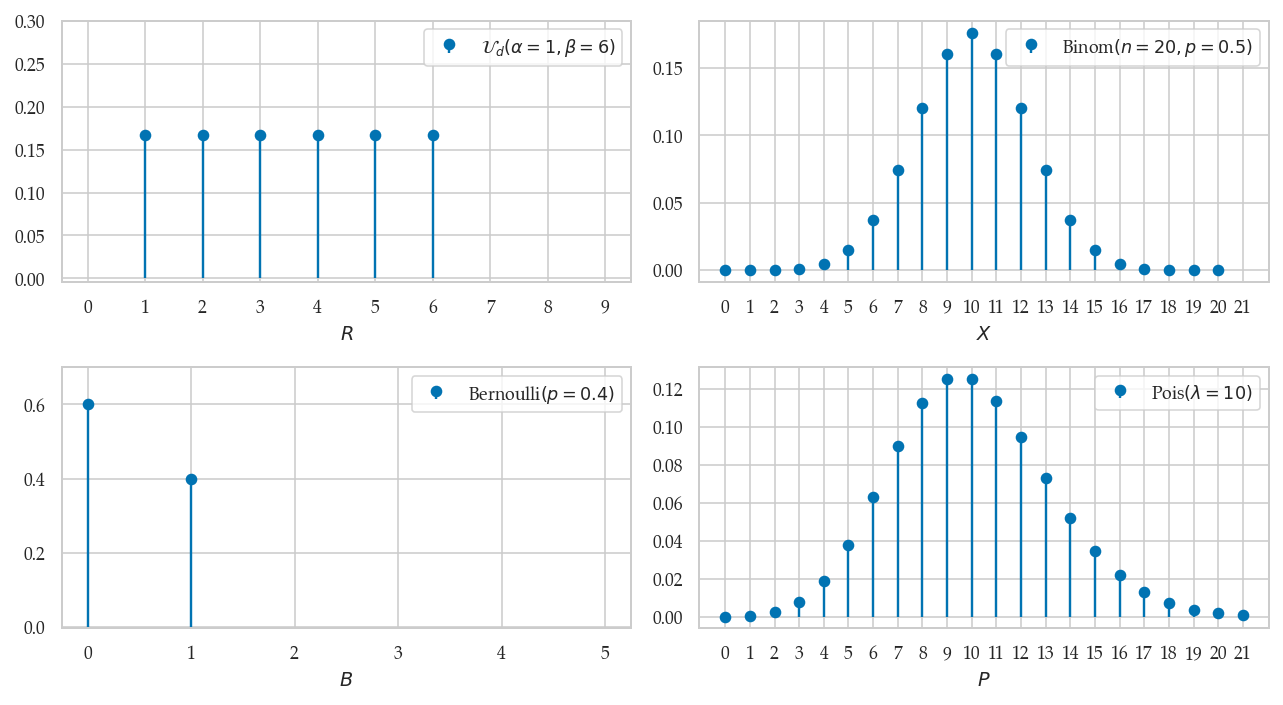

In [21]:
filename = os.path.join(DESTDIR, "prob_models_discrete_examples_panel.pdf")

from scipy.stats import randint
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson


from plot_helpers import plot_pmf

with plt.rc_context({"figure.figsize":(9,5)}):
    fig, axs = plt.subplots(2,2) # ,sharex=True)
    
    # randint
    ax = axs[0,0]
    rvR = randint(1, 6+1)
    plot_pmf(rvR, xlims=[0,10], ylims=[-0.004,0.3], ax=ax, label="$\mathcal{U}_d(\\alpha=1,\\beta=6)$")
    ax.set_xlabel("$R$")
    ax.set_ylabel("")

    # bernoulli
    ax = axs[1,0]
    rvN = bernoulli(0.4)
    plot_pmf(rvN, xlims=[0,6], ylims=[-0.004,0.7], ax=ax, label="Bernoulli$(p=0.4)$")
    ax.set_xlabel("$B$")
    ax.set_ylabel("")

    # binom
    ax = axs[0,1]
    rvB = binom(20, 0.5)
    plot_pmf(rvB, xlims=[0,22], ax=ax, label="Binom$(n=20,p=0.5)$")
    ax.set_xlabel("$X$")
    ax.set_ylabel("")

    # poisson
    ax = axs[1,1]
    lam = 10
    rvP = poisson(lam)
    plot_pmf(rvP, xlims=[0,22], ax=ax, label="Pois$(\lambda=10)$")
    ax.set_xlabel("$P$")
    ax.set_ylabel("")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Discrete uniform

In [22]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at
beta = 4   # stop at

# create the rv object
rvU = randint(alpha, beta+1)

# use one of the rv object's methods
rvU.support()

(1, 4)

In [23]:
# generate random number
rvU.rvs()

3

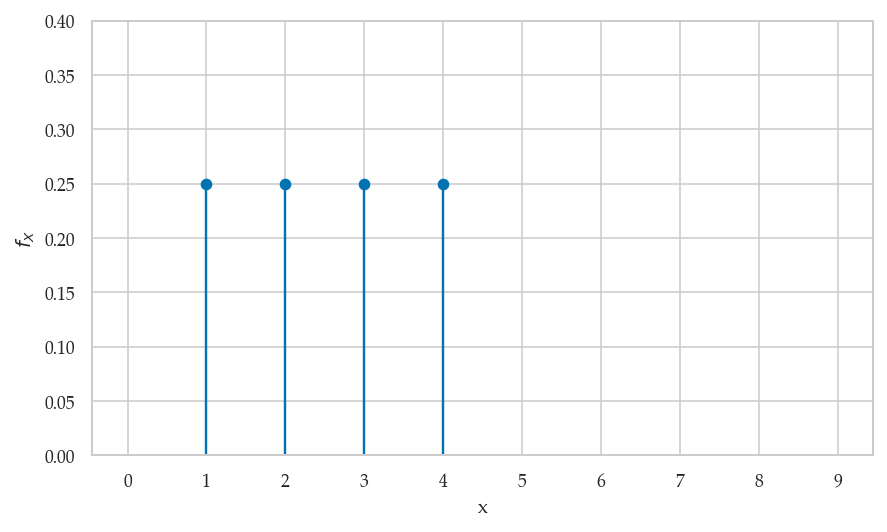

In [24]:
_ = plot_pmf(rvU, xlims=[0,10], ylims=[0,0.4])

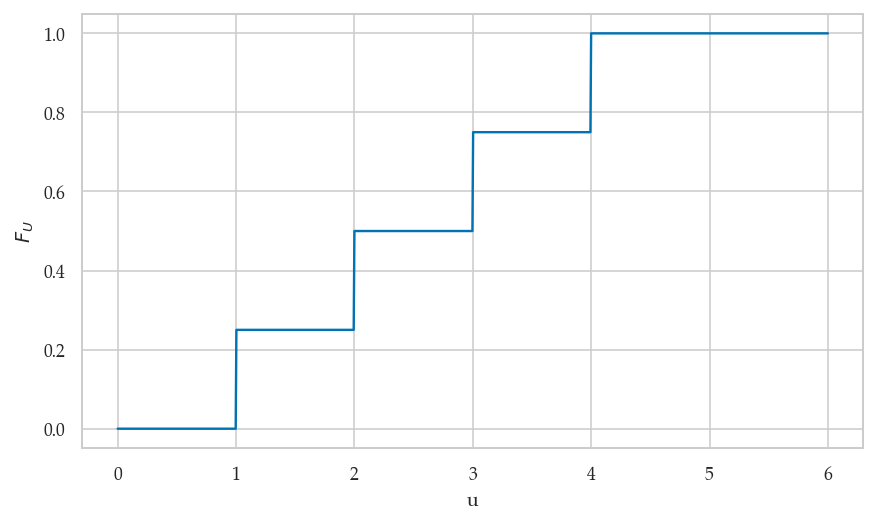

In [25]:
_ = plot_cdf(rvU, xlims=[0,6], rv_name="U")

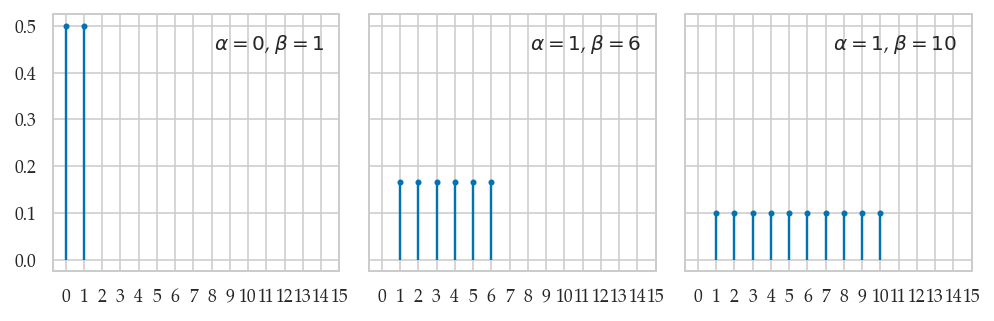

In [26]:
from scipy.stats import randint

xmax = 15
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 1)

# parameter dicts (list of lists)
params_matrix = [
    [dict(low=0,high=1+1),    dict(low=1,high=6+1),    dict(low=1,high=10+1)],
]

params_to_latex = {
    "low": "\\alpha",
    "high": "\\beta",
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    _ = generate_pmf_panel("figures/prob/probpanels/randint_panel.pdf",
                           xs, randint, params_matrix,
                           params_to_latex=params_to_latex,
                           xticks=xticks)

### Bernoulli

In [27]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)

In [28]:
rvB.support()

(0, 1)

In [29]:
rvB.mean(), rvB.var()

(0.3, 0.21)

In [30]:
rvB.rvs(10)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

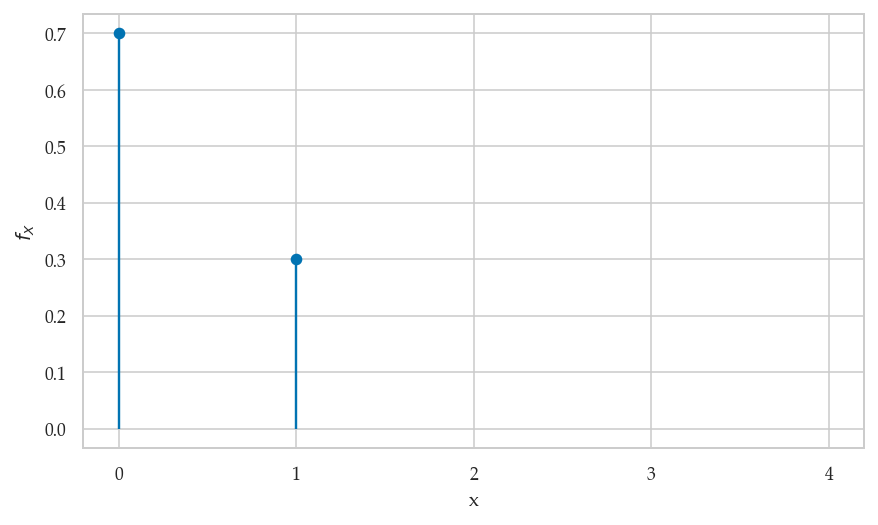

In [31]:
_ = plot_pmf(rvB, xlims=[0,5])

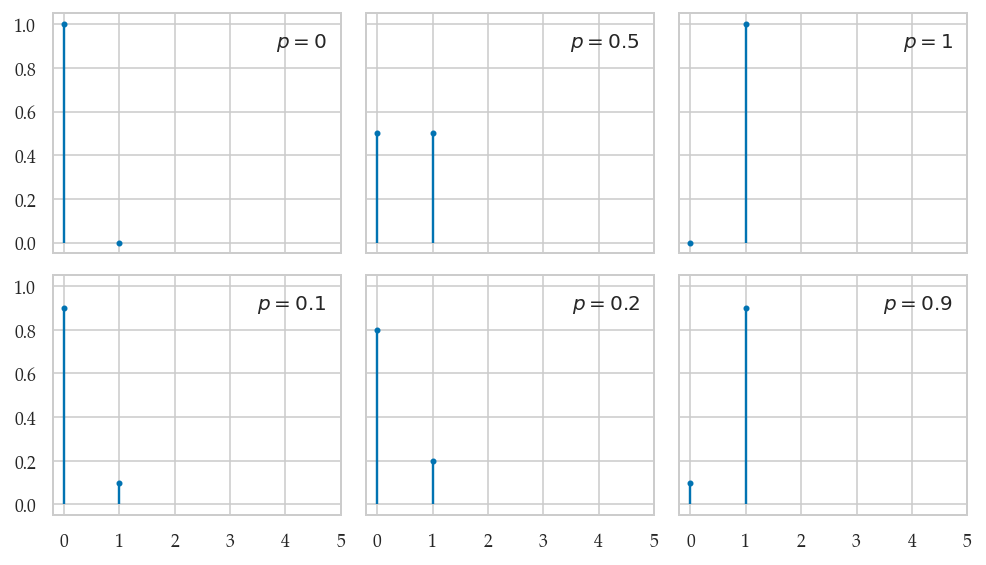

In [32]:
from scipy.stats import bernoulli

xmax = 5
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 1)


# parameter dicts (list of lists)
params_matrix = [
    [dict(p=0),  dict(p=0.5),  dict(p=1)],
    [dict(p=0.1),  dict(p=0.2),  dict(p=0.9)],
]

_ = generate_pmf_panel("figures/prob/probpanels/bernoulli_panel.pdf",
                   xs, bernoulli, params_matrix,
                   params_to_latex=params_to_latex,
                   xticks=xticks)

### Poisson


In [33]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

In [34]:
rvP.pmf(8)

0.11259903214902009

In [35]:
rvP.cdf(8)

0.3328196787507191

In [36]:
## ALT. way to compute the value F_P(8) =
# sum([rvP.pmf(x) for x in range(0,8+1)])

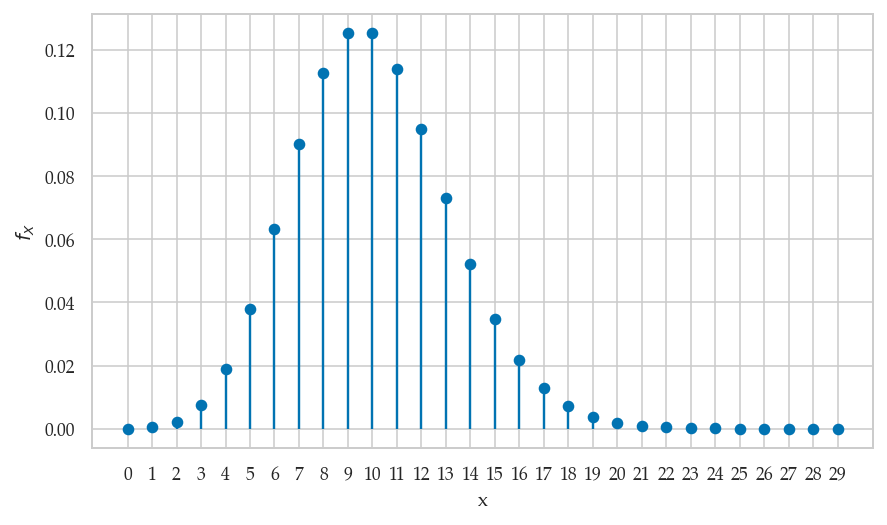

In [37]:
_ = plot_pmf(rvP, xlims=[0,30])

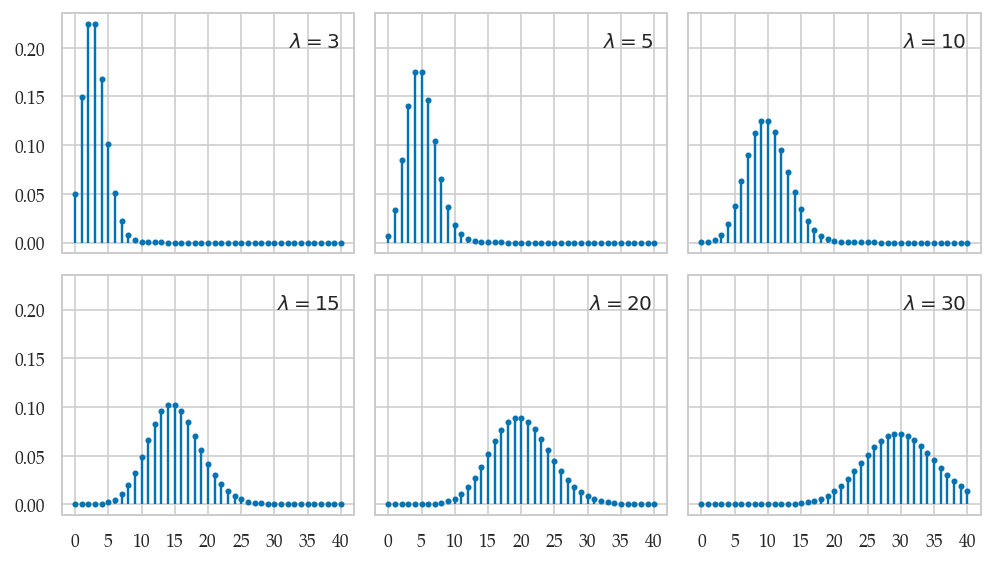

In [38]:
from scipy.stats import poisson

xmax = 41
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(mu=3),  dict(mu=5),  dict(mu=10)],
    [dict(mu=15), dict(mu=20), dict(mu=30)]
]

params_to_latex = {
    'mu': '\\lambda'
}

_ = generate_pmf_panel("figures/prob/probpanels/poisson_panel.pdf",
                       xs, poisson, params_matrix, xticks=xticks,
                       params_to_latex=params_to_latex)

### Binomial

We'll use the name `rvX` because `rvB` was already used for the Bernoulli random variable above.

In [39]:
from scipy.stats import binom

n = 20
p = 0.14
rvX = binom(n,p)


In [40]:
rvX.support()

(0, 20)

In [41]:
rvX.mean(), rvX.var()

(2.8000000000000003, 2.4080000000000004)

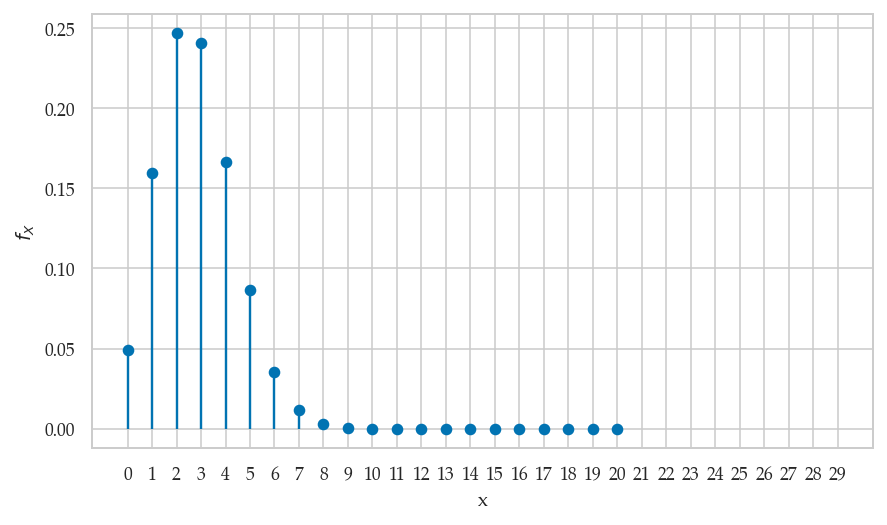

In [42]:
_ = plot_pmf(rvX, xlims=[0,30])

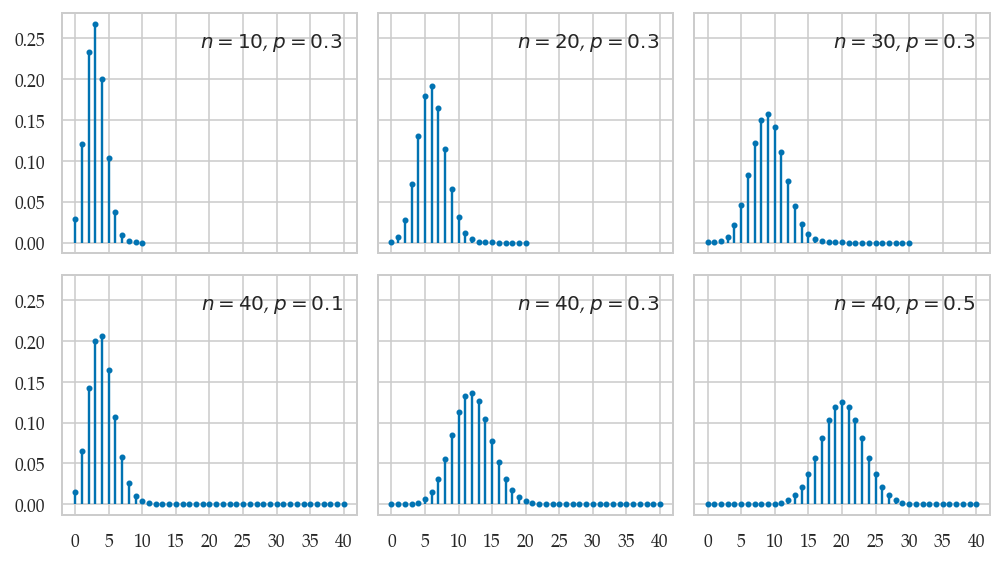

In [43]:
from scipy.stats import binom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=10, p=0.3),  dict(n=20, p=0.3),  dict(n=30, p=0.3) ],
    [ dict(n=40, p=0.1),   dict(n=40, p=0.3),   dict(n=40, p=0.5)  ],
]

_ = generate_pmf_panel("figures/prob/probpanels/binomial_panel.pdf",
                       xs, binom, params_matrix, xticks=xticks)

### Geometric

In [44]:
from scipy.stats import geom

rvG = geom(p = 0.2)

In [45]:
rvG.support()

(1, inf)

In [46]:
rvG.mean(), rvG.var()

(5.0, 20.0)

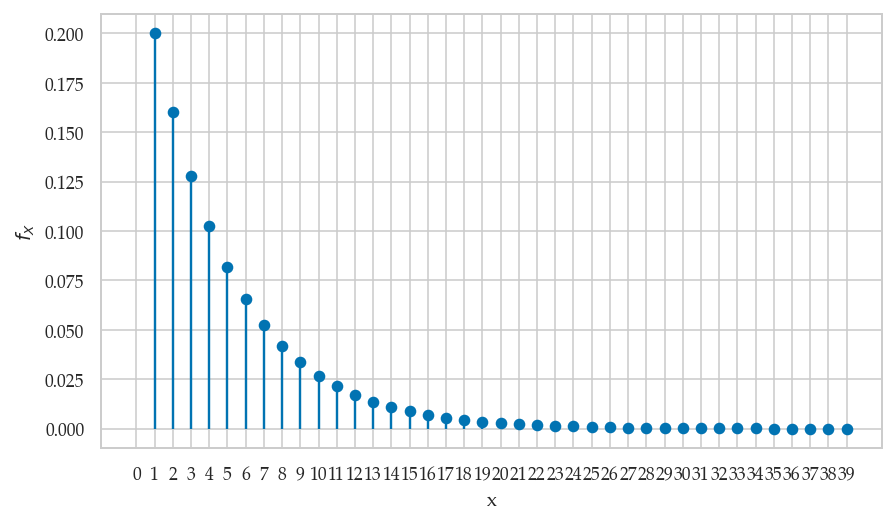

In [47]:
_ = plot_pmf(rvG, xlims=[0,40])

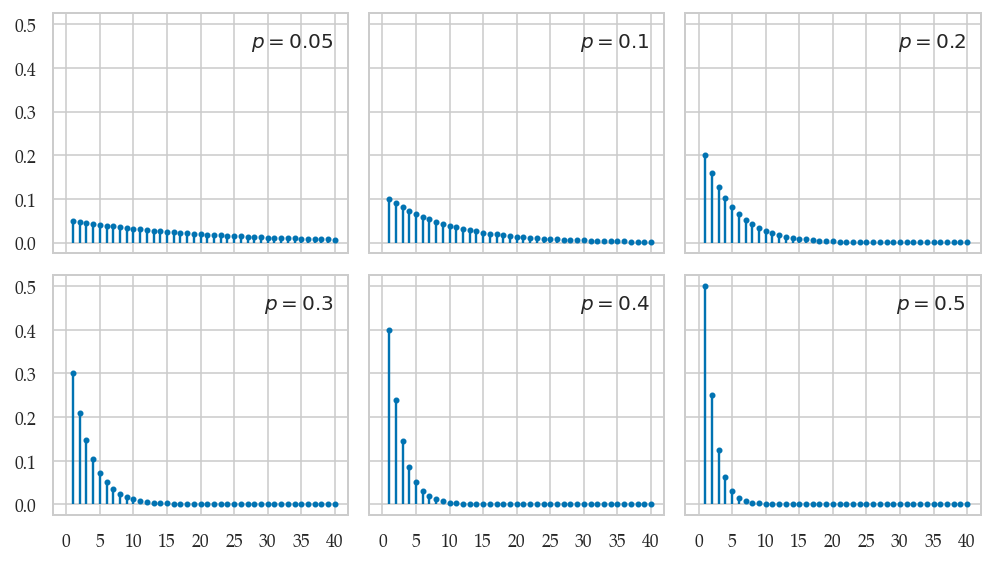

In [48]:
from scipy.stats import geom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(p=0.05),  dict(p=0.1),  dict(p=0.2) ],
    [ dict(p=0.3),   dict(p=0.4),  dict(p=0.5) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/geometric_panel.pdf",
                       xs, geom, params_matrix, xticks=xticks)

### Negative binomial

In [49]:
from scipy.stats import nbinom

n = 10
p = 0.6
rvN = nbinom(n,p)

In [50]:
rvN.support()

(0, inf)

In [51]:
rvN.mean(), rvN.var()

(6.666666666666667, 11.11111111111111)

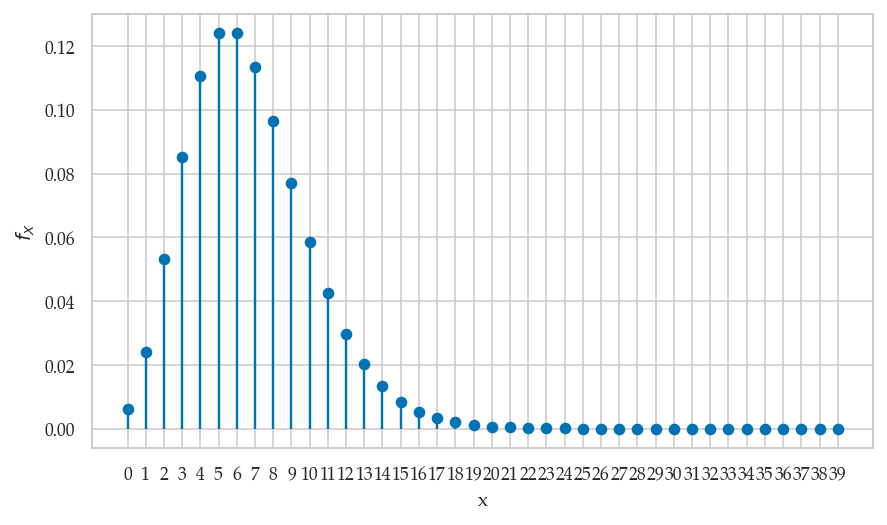

In [52]:
_ = plot_pmf(rvN, xlims=[0,40])

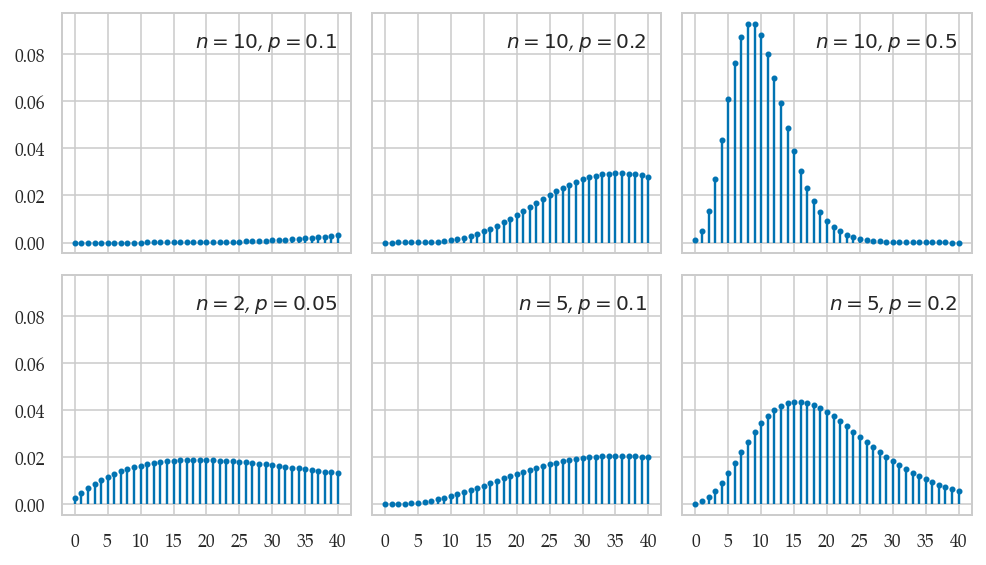

In [53]:
from scipy.stats import nbinom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=10, p=0.1),  dict(n=10, p=0.2),  dict(n=10,p=0.5) ],
    [ dict(n=2,  p=0.05), dict(n=5,  p=0.1),  dict(n=5, p=0.2) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/nbinom_panel.pdf",
                       xs, nbinom, params_matrix, xticks=xticks)

### Hypergeometric

<!--
# - arg1 = `internal M` = the total number of objects   == a+b
# - arg2 = `internal n` = number of success objects     == a 
# - arg3 = `internal N` = number of draws               == n
-->

In [54]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)

In [55]:
rvH.support()

(0, 20)

In [56]:
rvH.mean(), rvH.var()

(8.571428571428571, 3.54924578527063)

In [57]:
meanH, stdH = rvH.stats()
print("mean =", meanH, "  std =", stdH)

mean = 8.571428571428571   std = 3.54924578527063


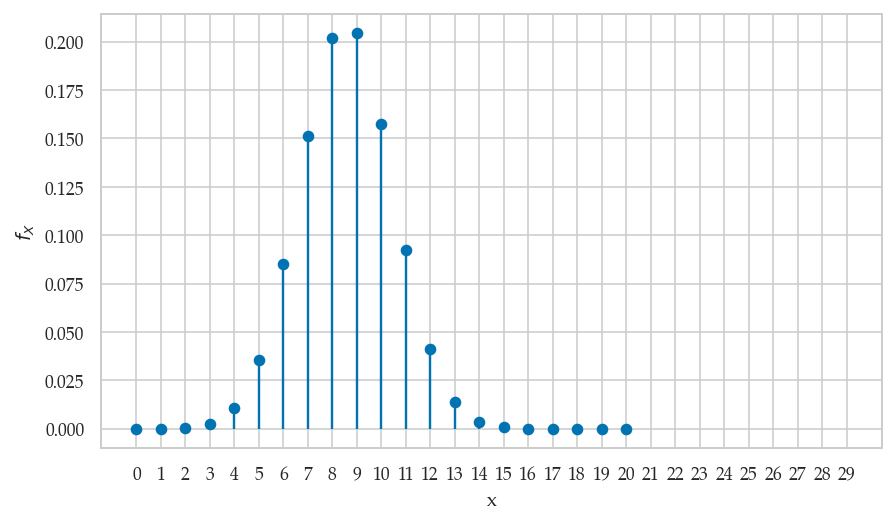

In [58]:
_ = plot_pmf(rvH, xlims=[0,30])

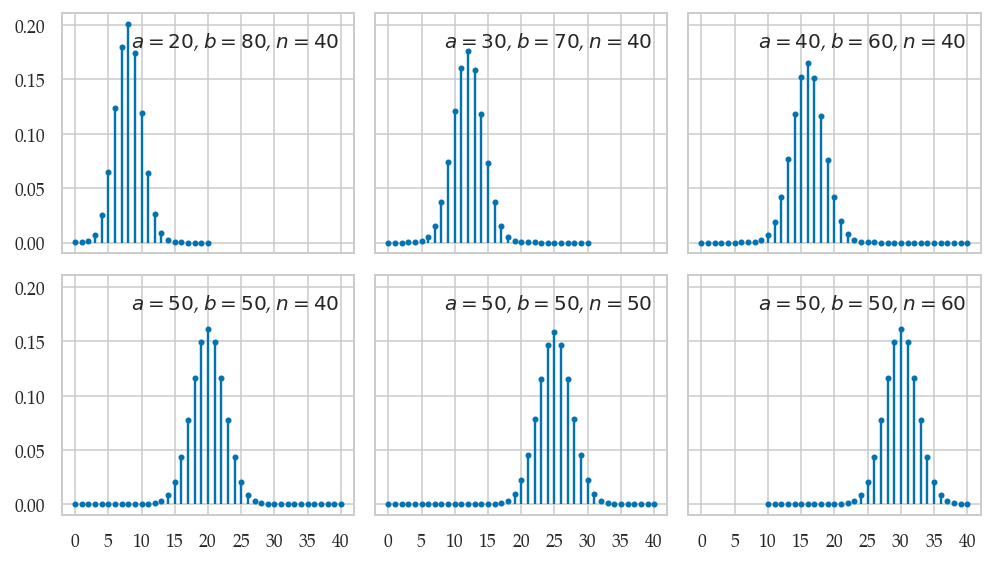

In [59]:
from scipy.stats import hypergeom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(M=100,n=20,N=40), dict(M=100,n=30,N=40), dict(M=100,n=40,N=40) ],
    [ dict(M=100,n=50,N=40), dict(M=100,n=50,N=50), dict(M=100,n=50,N=60) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/hypergeom_panel.pdf",
                       xs, hypergeom, params_matrix, xticks=xticks)

##### Tomatoes salad probabilities

(0.28571428571428575, 0.5714285714285715, 0.14285714285714288)

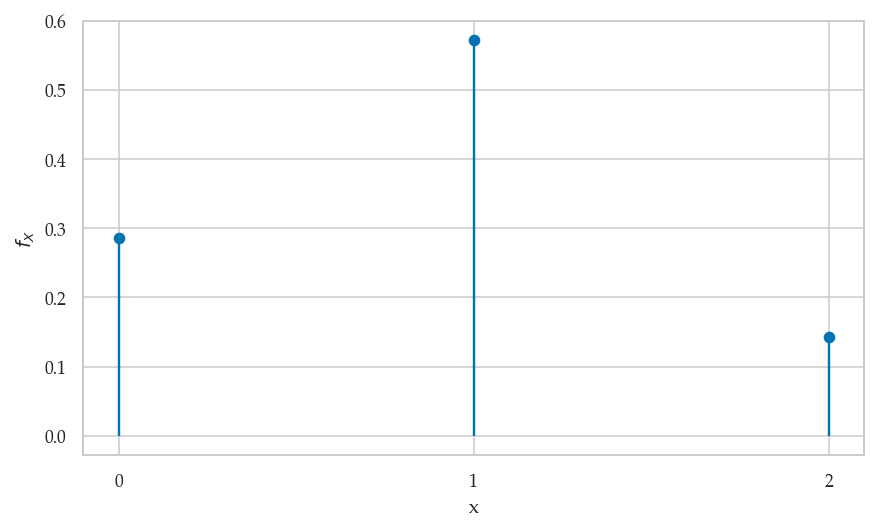

In [60]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)


_ = plot_pmf(rvHe, xlims=[0,3])

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [61]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

In [62]:
# Pr of exactly five dogs
rvD.pmf(5)

0.2860681114551084

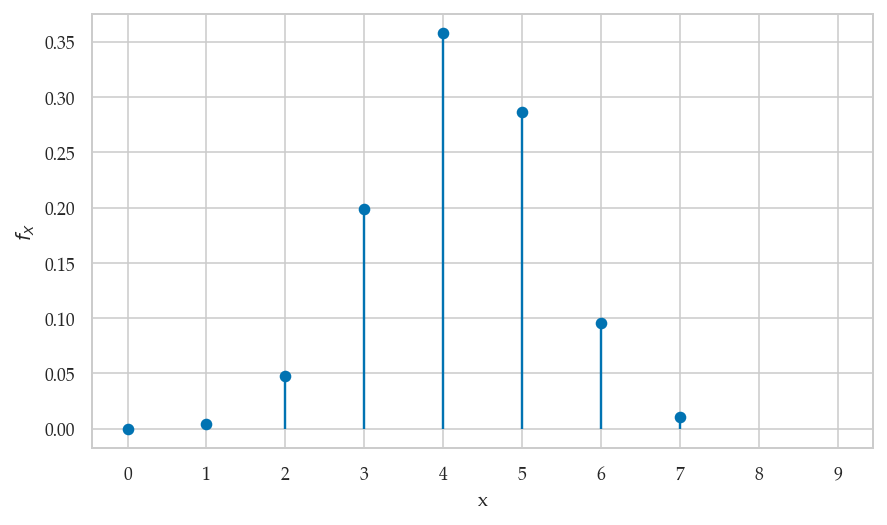

In [63]:
_ = plot_pmf(rvD, xlims=[0,10])

### Multinomial

See [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).

In [64]:
from scipy.stats import multinomial

n = 10
ps = [0.1, 0.5, 0.8]

rvM = multinomial(n,ps)

In [65]:
rvM.rvs()

array([[0, 5, 5]])

In [66]:
# TODO: 3D scatter plot of points in space

## Modelling real-world data using probability

## Discussion